# Introduction

We Look at a data set of a collection of cars (mtcars), we are interested in exploring the relationship between a set of variables and miles per gallon (MPG) (outcome). we are particularly interested in the following two questions:

 * "Is an automatic or manual transmission better for MPG"

* "Quantify the MPG difference between automatic and manual transmissions"


The variables included in this dataset are:

- mpg :	Miles/(US) gallon
- cyl	: Number of cylinders
- disp :	Displacement (cu.in.)
- hp : Gross horsepower
- drat :	Rear axle ratio
- wt :	Weight (1000 lbs)
- qsec :	1/4 mile time
- vs :	Engine (0 = V-shaped, 1 = straight)
- am :	Transmission (0 = automatic, 1 = manual)
- gear :	Number of forward gears


# Loading And Preprocessing The Data

### Importing The Libs

In [241]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.stats.api as sms
import seaborn as sb
import statsmodels.api as sm
from matplotlib import rcParams
import statsmodels.formula.api as smf
from statsmodels.nonparametric.smoothers_lowess import lowess
import scipy.stats as stats

### Import The Dataset

In [221]:
mtcars = pd.read_csv('mtcars.csv')
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [222]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [223]:
mtcars = mtcars.drop(['Unnamed: 0'], axis = 1)

In [224]:
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


# Analysis

### Running t-test

In [225]:
atcars = mtcars['mpg'][mtcars['am'] == 0]
mncars = mtcars['mpg'][mtcars['am'] == 1]

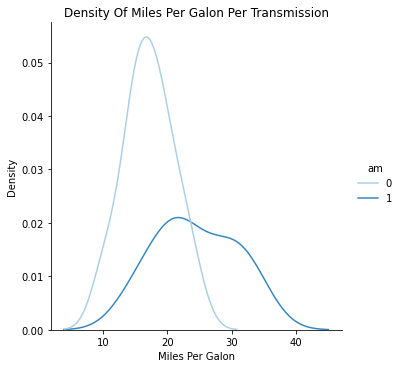

In [226]:
plt.rcParams["figure.figsize"] = [16,9]

sb.displot(data=mtcars, x= "mpg",
              hue="am",
              kind="kde", palette = 'Blues')
plt.title("Density Of Miles Per Galon Per Transmission")
plt.xlabel('Miles Per Galon')

plt.show()

In [227]:
cm = sms.CompareMeans(sms.DescrStatsW(atcars), sms.DescrStatsW(mncars))
print(cm.summary(usevar='unequal'))

                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -7.2449      1.923     -3.767      0.001     -11.280      -3.210


### Barplot Of The Miles Per Galon By Transmission

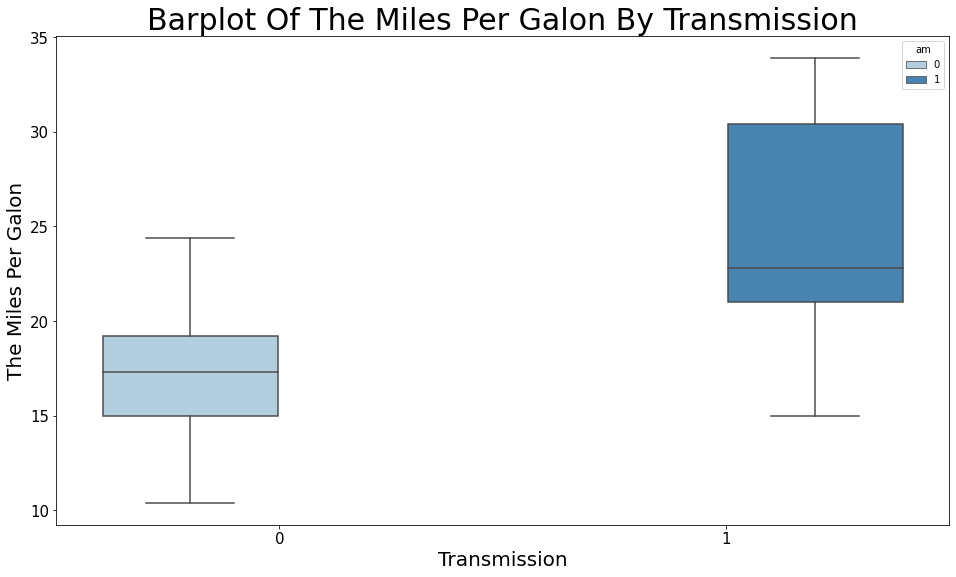

In [228]:
plt.rcParams["figure.figsize"] = [16,9]

b = sb.boxplot(x="am", y="mpg", hue = "am", data=mtcars, 
           palette = "Blues")
b.axes.set_title('Barplot Of The Miles Per Galon By Transmission',fontsize=30)
b.set_xlabel("Transmission",fontsize=20)
b.set_ylabel("The Miles Per Galon",fontsize=20)
b.tick_params(labelsize=15)

plt.show()

From this barplot we can assume that there is a significant association between Miles Per Galon and Transmission.

### Correlations

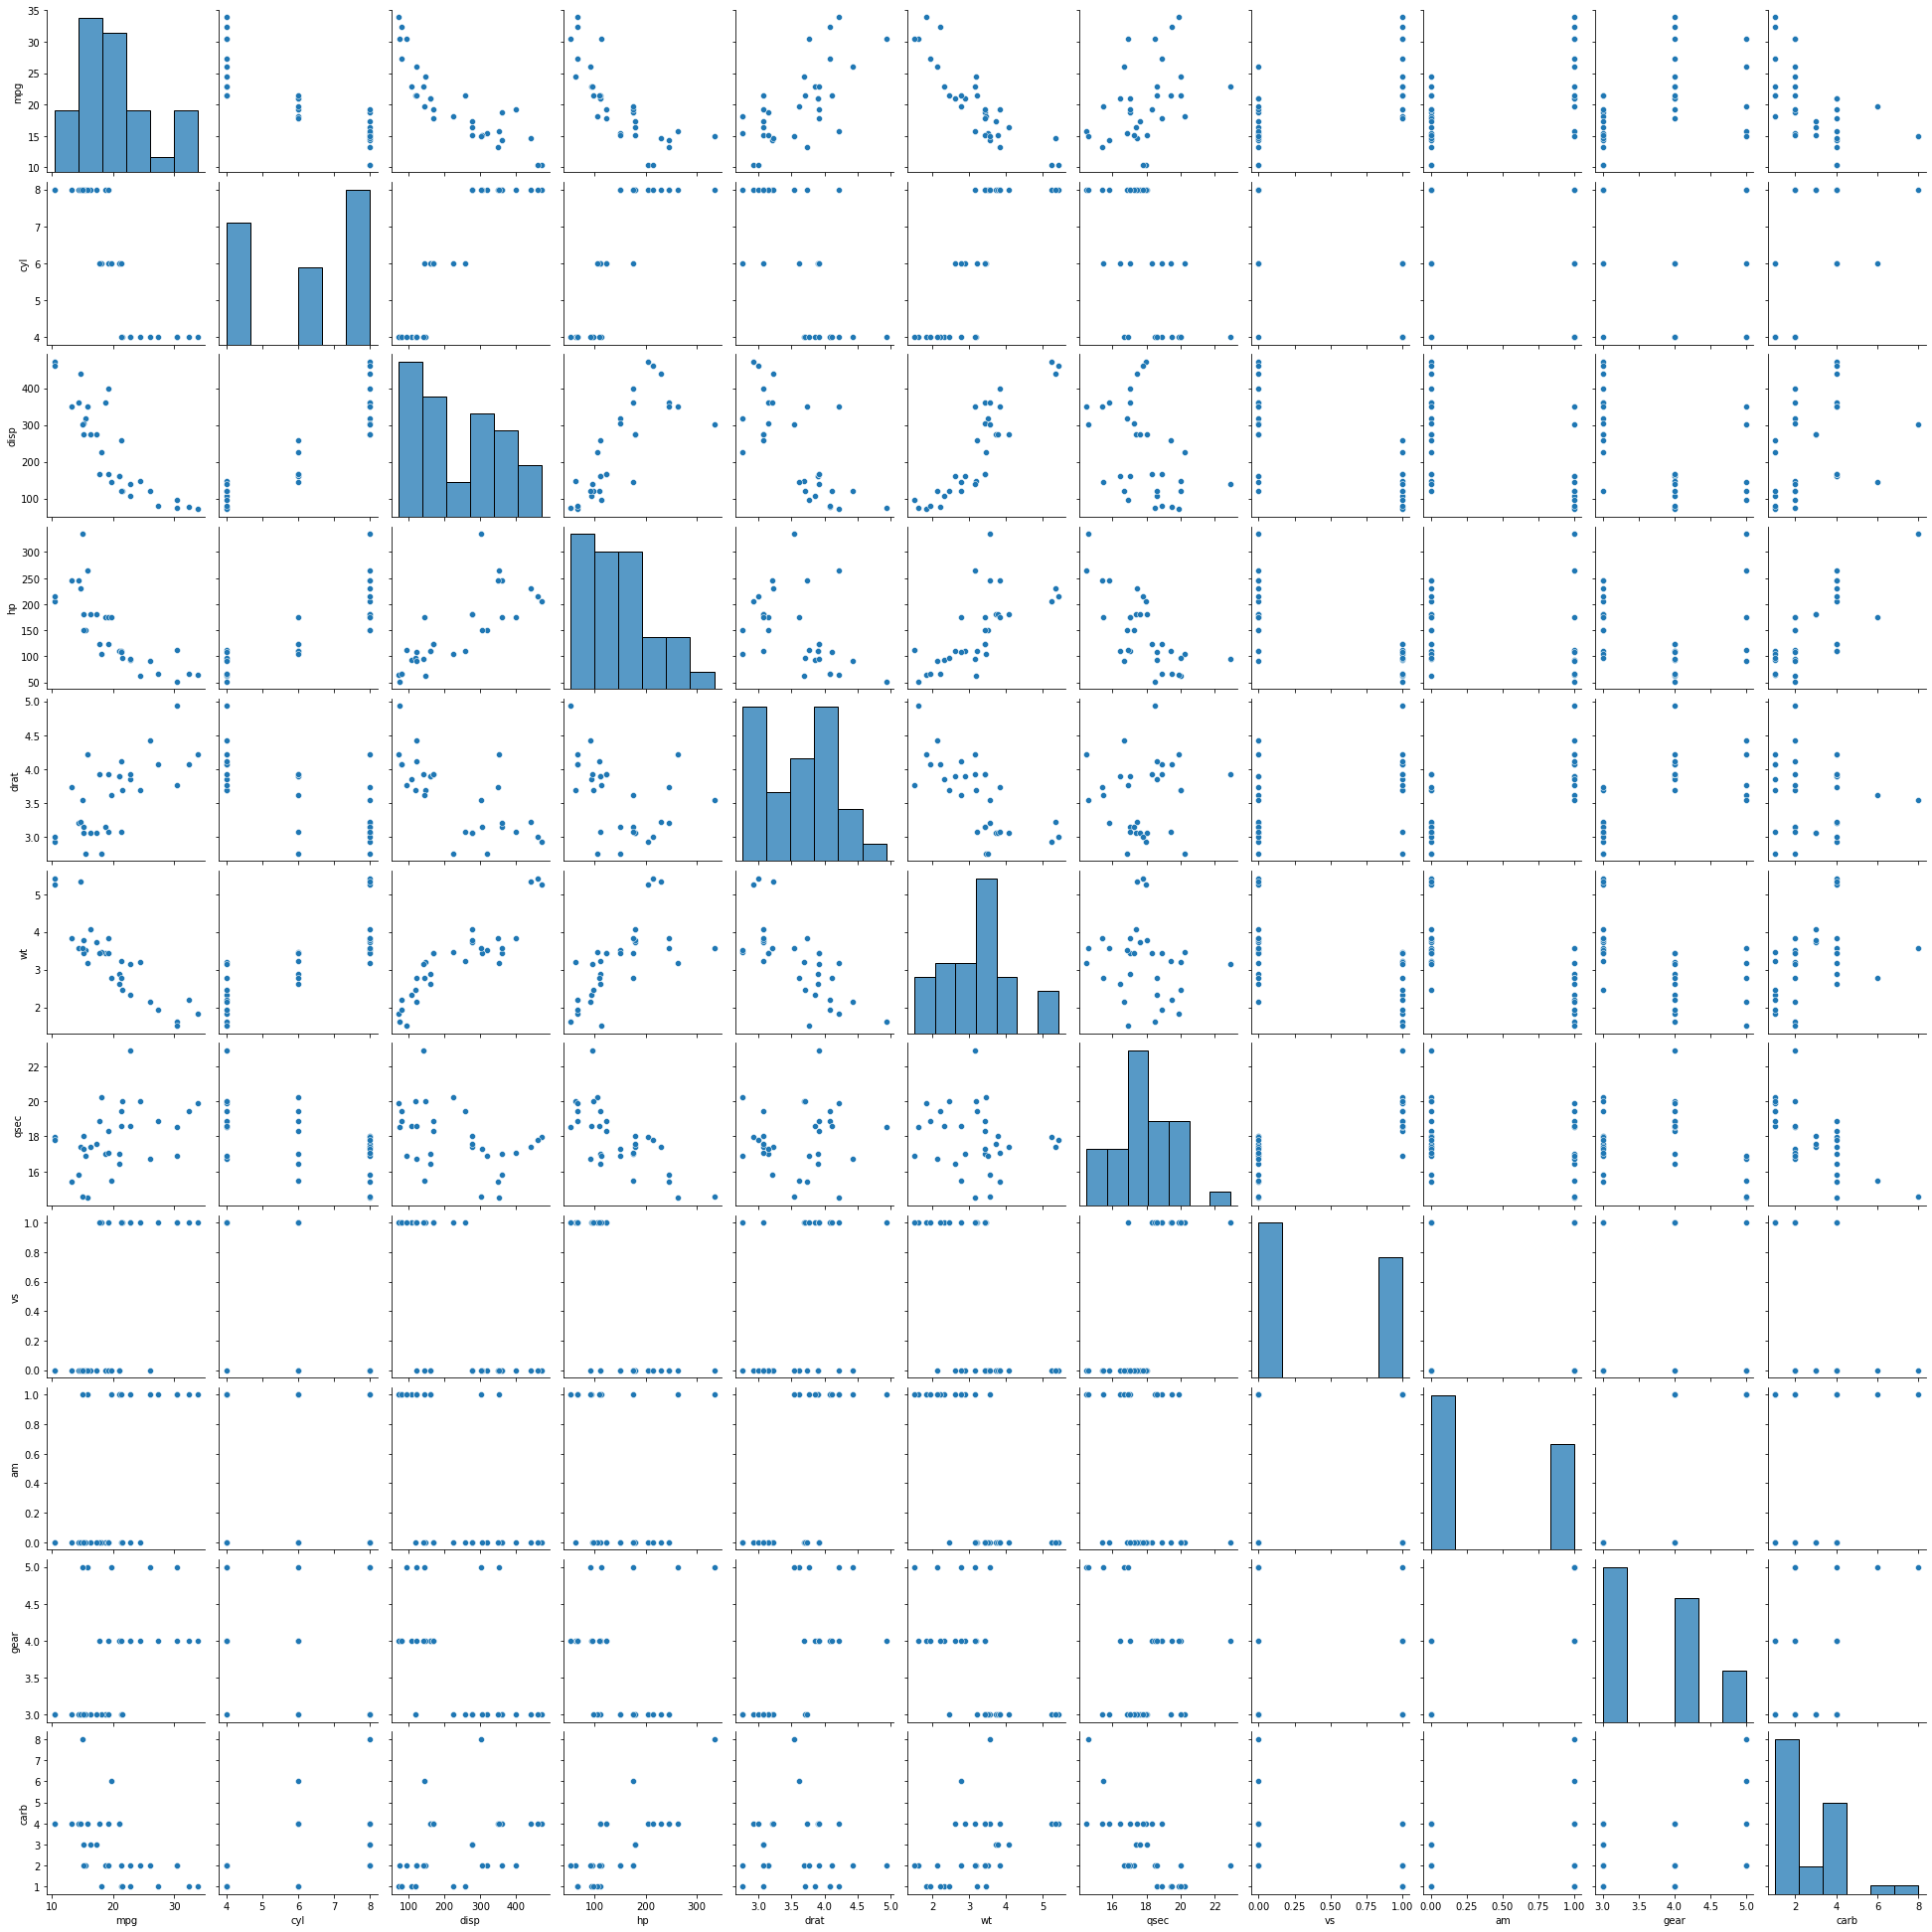

In [229]:
sb.pairplot(mtcars)
plt.draw()

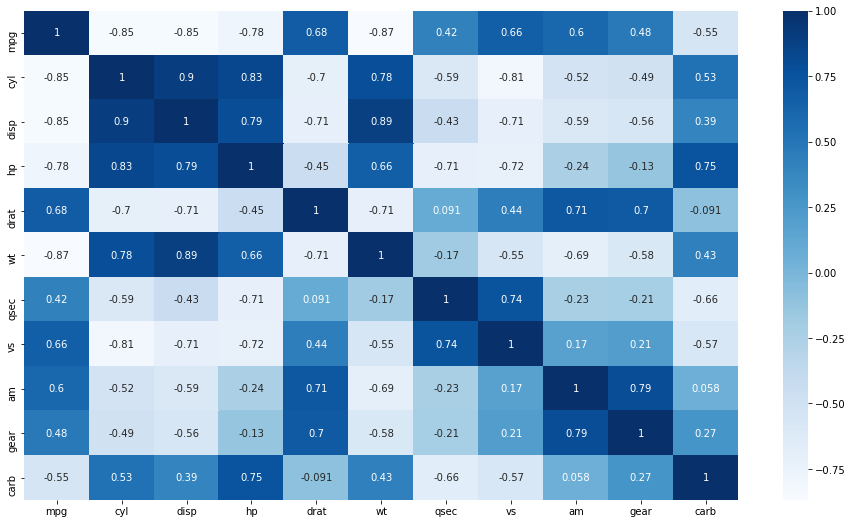

In [230]:
corrMatrix = mtcars.corr()

sb.heatmap(corrMatrix, annot=True, cmap="Blues")
plt.show()

# Linear Models

### Choosing The Predictors (Backward Elimination)

In [231]:
mtcars_2 = mtcars.drop(['mpg'], axis = 1)
mpg = mtcars['mpg']

cols = list(mtcars_2.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = mtcars_2[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(mpg,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['wt', 'qsec', 'am']


In [233]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

m01 = ols('mpg ~ wt + qsec + am', data=mtcars).fit()
m02 = ols('mpg ~ wt + qsec + am + disp + cyl', data=mtcars).fit()

anovaResults = anova_lm(m01, m02)
print(anovaResults)

   df_resid         ssr  df_diff   ss_diff         F    Pr(>F)
0      28.0  169.285930      0.0       NaN       NaN       NaN
1      26.0  161.413943      2.0  7.871987  0.633996  0.538471


The P-value is higher than the threshold (0.05), so the best model is the first one.

In [235]:
m01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     52.75
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           1.21e-11
Time:                        22:00:57   Log-Likelihood:                -72.060
No. Observations:                  32   AIC:                             152.1
Df Residuals:                      28   BIC:                             158.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.6178      6.960      1.382      0.178      -4.638      23.874
wt            -3.9165      0.711     -5.507      0.000      -5.373      -2.460
qsec           1.2259      0.289      4.247      0.000       0.635       1.817
am             2.9358      1.411      2.081      0.047       0.046       5.826
==============================================================================
Omnibus:                        2.574   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.213
Skew:                           0.540   Prob(JB):                        0.331
Kurtosis:                       2.297   Cond. No.                         296.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on this multivariate regression model, a manual transmission car has a fuel efficiency of 2.94 MPG higher than that of automatic transmission cars. The adjusted R^2 of the model is 0.834, meaning that 83% of the variance in mpg can be explained by the model.

# Residuals

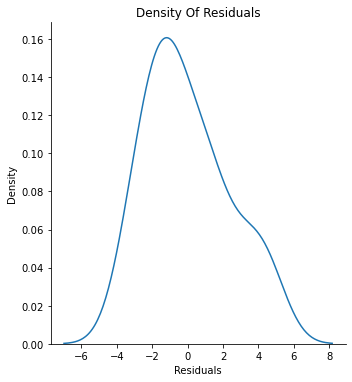

In [237]:
residuals = m01.resid

plt.rcParams["figure.figsize"] = [16,9]

sb.displot(residuals,
              kind="kde", palette = 'Blues')
plt.title("Density Of Residuals")
plt.xlabel('Residuals')

plt.show()

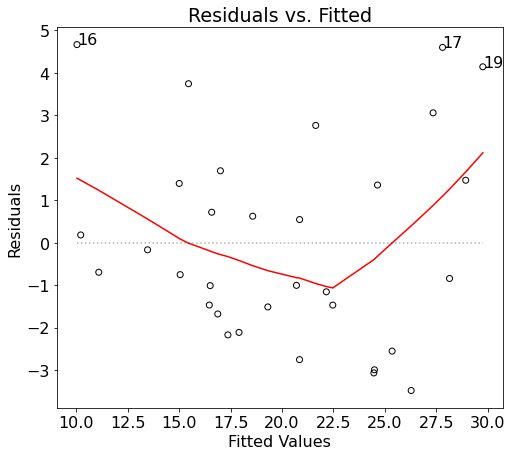

In [242]:
fitted = m01.fittedvalues
smoothed = lowess(residuals,fitted)
top3 = abs(residuals).sort_values(ascending = False)[:3]

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

for i in top3.index:
    ax.annotate(i,xy=(fitted[i],residuals[i]))

plt.show()

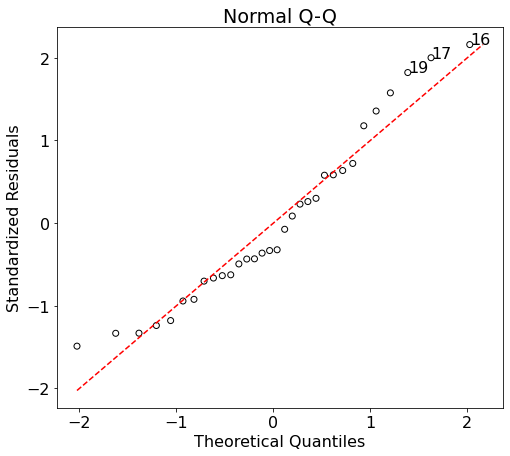

In [245]:
sorted_student_residuals = pd.Series(m01.get_influence().resid_studentized_internal)
sorted_student_residuals.index = m01.resid.index
sorted_student_residuals = sorted_student_residuals.sort_values(ascending = True)
df = pd.DataFrame(sorted_student_residuals)
df.columns = ['sorted_student_residuals']
df['theoretical_quantiles'] = stats.probplot(df['sorted_student_residuals'], dist = 'norm', fit = False)[0]
rankings = abs(df['sorted_student_residuals']).sort_values(ascending = False)
top3 = rankings[:3]

fig, ax = plt.subplots()
x = df['theoretical_quantiles']
y = df['sorted_student_residuals']
ax.scatter(x,y, edgecolor = 'k',facecolor = 'none')
ax.set_title('Normal Q-Q')
ax.set_ylabel('Standardized Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.plot([np.min([x,y]),np.max([x,y])],[np.min([x,y]),np.max([x,y])], color = 'r', ls = '--')
for val in top3.index:
    ax.annotate(val,xy=(df['theoretical_quantiles'].loc[val],df['sorted_student_residuals'].loc[val]))
plt.show()

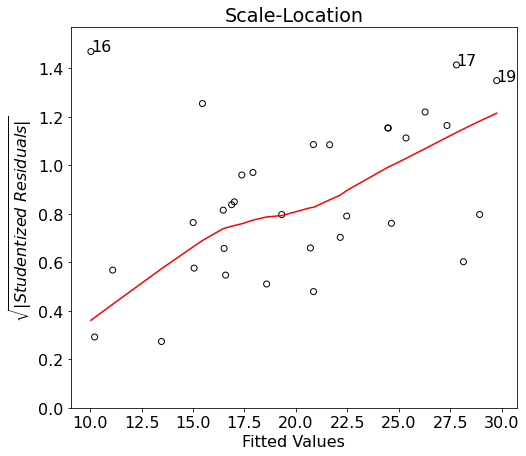

In [246]:
student_residuals = m01.get_influence().resid_studentized_internal
sqrt_student_residuals = pd.Series(np.sqrt(np.abs(student_residuals)))
sqrt_student_residuals.index = m01.resid.index
smoothed = lowess(sqrt_student_residuals,fitted)
top3 = abs(sqrt_student_residuals).sort_values(ascending = False)[:3]

fig, ax = plt.subplots()
ax.scatter(fitted, sqrt_student_residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('$\sqrt{|Studentized \ Residuals|}$')
ax.set_xlabel('Fitted Values')
ax.set_title('Scale-Location')
ax.set_ylim(0,max(sqrt_student_residuals)+0.1)
for i in top3.index:
    ax.annotate(i,xy=(fitted[i],sqrt_student_residuals[i]))
plt.show()

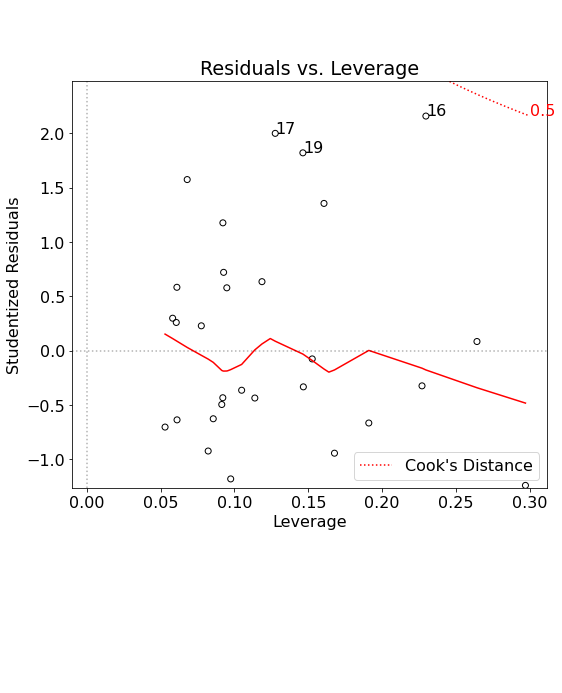

In [248]:
student_residuals = pd.Series(m01.get_influence().resid_studentized_internal)
student_residuals.index = m01.resid.index
df = pd.DataFrame(student_residuals)
df.columns = ['student_residuals']
df['leverage'] = m01.get_influence().hat_matrix_diag
smoothed = lowess(df['student_residuals'],df['leverage'])
sorted_student_residuals = abs(df['student_residuals']).sort_values(ascending = False)
top3 = sorted_student_residuals[:3]

fig, ax = plt.subplots()
x = df['leverage']
y = df['student_residuals']
xpos = max(x)+max(x)*0.01  
ax.scatter(x, y, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Studentized Residuals')
ax.set_xlabel('Leverage')
ax.set_title('Residuals vs. Leverage')
ax.set_ylim(min(y)-min(y)*0.15,max(y)+max(y)*0.15)
ax.set_xlim(-0.01,max(x)+max(x)*0.05)
plt.tight_layout()
for val in top3.index:
    ax.annotate(val,xy=(x.loc[val],y.loc[val]))

cooksx = np.linspace(min(x), xpos, 50)
p = len(m01.params)
poscooks1y = np.sqrt((p*(1-cooksx))/cooksx)
poscooks05y = np.sqrt(0.5*(p*(1-cooksx))/cooksx)
negcooks1y = -np.sqrt((p*(1-cooksx))/cooksx)
negcooks05y = -np.sqrt(0.5*(p*(1-cooksx))/cooksx)

ax.plot(cooksx,poscooks1y,label = "Cook's Distance", ls = ':', color = 'r')
ax.plot(cooksx,poscooks05y, ls = ':', color = 'r')
ax.plot(cooksx,negcooks1y, ls = ':', color = 'r')
ax.plot(cooksx,negcooks05y, ls = ':', color = 'r')
ax.plot([0,0],ax.get_ylim(), ls=":", alpha = .3, color = 'k')
ax.plot(ax.get_xlim(), [0,0], ls=":", alpha = .3, color = 'k')
ax.annotate('1.0', xy = (xpos, poscooks1y[-1]), color = 'r')
ax.annotate('0.5', xy = (xpos, poscooks05y[-1]), color = 'r')
ax.annotate('1.0', xy = (xpos, negcooks1y[-1]), color = 'r')
ax.annotate('0.5', xy = (xpos, negcooks05y[-1]), color = 'r')
ax.legend()
plt.show()

We have some outliers in the dataset, but they don’t have high leverage or influence. So we don’t need to omit them.

# Conclusion

To conclude, we assume that there is a significant association between Miles Per Galon and Transmission, and a manual transmission car has a fuel efficiency of 2.54 MPG higher than that of automatic transmission cars.